Code to try out forecasting of T as Output and Humidity as Regressor - Using Linear Regression 

In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns




In [104]:
df = pd.read_excel(r'/Users/shailendra0408/Desktop/CSA_Temp.xlsx')
data_array = np.array(df)
print(data_array)
print(df.head())

[[12.7 92. ]
 [12.7 92. ]
 [12.7 91. ]
 ...
 [21.8 69. ]
 [21.1 73. ]
 [20.4 75. ]]
   Temperature  Relative Humidity
0         12.7                 92
1         12.7                 92
2         12.7                 91
3         13.0                 91
4         13.2                 89


In [105]:
T_data, RH_data = data_array[:,0], data_array[:,1]

T_data_train, T_data_test, RH_data_train, RH_data_test = train_test_split(T_data, RH_data, random_state=42, 
                                   test_size=0.10, 
                                   shuffle=True)

T_data_train = T_data_train.reshape(-1,1)
RH_data_train = RH_data_train.reshape(-1,1)
RH_data_test = RH_data_test.reshape(-1,1)
RH_data_train = RH_data_train.reshape(-1,1)

print (RH_data_test, RH_data_train, T_data_test, T_data_train)



[[ 52.]
 [ 96.]
 [ 76.]
 [ 61.]
 [ 70.]
 [ 23.]
 [100.]
 [ 90.]
 [ 38.]
 [ 60.]
 [ 72.]
 [ 91.]
 [ 57.]
 [ 45.]
 [ 49.]
 [ 49.]
 [ 47.]
 [ 51.]
 [ 51.]
 [ 99.]
 [ 42.]
 [100.]
 [ 82.]
 [ 76.]
 [ 81.]
 [ 92.]
 [ 99.]
 [ 98.]
 [ 59.]
 [ 39.]
 [ 98.]
 [ 95.]
 [ 98.]
 [100.]
 [ 99.]
 [ 47.]
 [ 97.]
 [ 90.]
 [ 58.]
 [ 66.]
 [ 93.]
 [ 53.]
 [ 53.]
 [ 79.]
 [ 75.]
 [ 86.]
 [100.]
 [ 98.]
 [ 76.]
 [100.]
 [ 50.]
 [ 87.]
 [ 47.]
 [ 27.]
 [ 81.]
 [ 45.]
 [ 81.]
 [ 49.]
 [ 63.]
 [ 53.]
 [ 46.]
 [ 44.]
 [100.]
 [ 96.]
 [ 75.]
 [ 84.]
 [ 91.]
 [ 53.]
 [ 36.]
 [ 67.]
 [100.]
 [ 47.]
 [ 61.]
 [ 40.]
 [ 48.]
 [ 72.]
 [ 56.]
 [ 90.]
 [ 51.]
 [ 85.]
 [ 50.]
 [ 91.]
 [ 51.]
 [ 73.]
 [ 80.]
 [ 96.]
 [ 52.]
 [ 47.]
 [ 89.]
 [ 44.]
 [ 74.]
 [ 53.]
 [ 60.]
 [ 44.]
 [ 78.]
 [ 47.]
 [ 88.]
 [ 87.]
 [ 62.]
 [ 31.]
 [ 75.]
 [ 51.]
 [ 75.]
 [ 48.]
 [ 55.]
 [ 46.]
 [100.]
 [ 68.]
 [ 93.]
 [ 76.]
 [ 91.]
 [ 66.]
 [ 51.]
 [ 75.]
 [100.]
 [ 81.]
 [ 74.]
 [ 68.]
 [ 48.]
 [ 95.]
 [ 44.]
 [ 45.]
 [ 42.]
 [ 86.]
 [ 53.]


In [106]:
model = LinearRegression()
model = LinearRegression().fit(T_data_train, RH_data_train)

In [107]:
r_sq = model.score(T_data_train, RH_data_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.6793321217515413
intercept: [131.63731878]
slope: [[-3.11532119]]


In [108]:
RH_data_test = RH_data_test.reshape(-1,1)
Temp_new_data = model.predict(RH_data_test)
Temp_new_data

array([[ -30.35938291],
       [-167.43351511],
       [-105.12709138],
       [ -58.39727359],
       [ -86.43516426],
       [  59.98493149],
       [-179.89479985],
       [-148.74158799],
       [  13.2551137 ],
       [ -55.2819524 ],
       [ -92.66580663],
       [-151.85690917],
       [ -45.93598884],
       [  -8.5521346 ],
       [ -21.01341935],
       [ -21.01341935],
       [ -14.78277698],
       [ -27.24406172],
       [ -27.24406172],
       [-176.77947866],
       [   0.79382895],
       [-179.89479985],
       [-123.8190185 ],
       [-105.12709138],
       [-120.70369731],
       [-154.97223036],
       [-176.77947866],
       [-173.66415748],
       [ -52.16663121],
       [  10.13979251],
       [-173.66415748],
       [-164.31819392],
       [-173.66415748],
       [-179.89479985],
       [-176.77947866],
       [ -14.78277698],
       [-170.54883629],
       [-148.74158799],
       [ -49.05131003],
       [ -73.97387952],
       [-158.08755155],
       [ -33.474

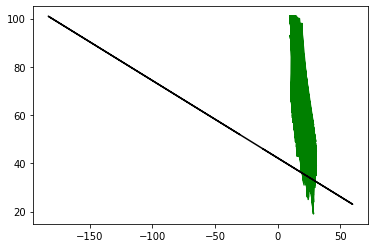

In [125]:
plt.plot(T_data_train,RH_data_train,color='g') 
plt.plot(Temp_new_data, RH_data_test,color='k') 

plt.show()

/var/folders/b_/bzbh29xx1wgd1q4j08jf5cbr0000gn/T/ipykernel_31830/2527615988.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  g = ax.scatter(x = T_data_train,
/var/folders/b_/bzbh29xx1wgd1q4j08jf5cbr0000gn/T/ipykernel_31830/2527615988.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  g = ax.scatter(x = Temp_new_data,


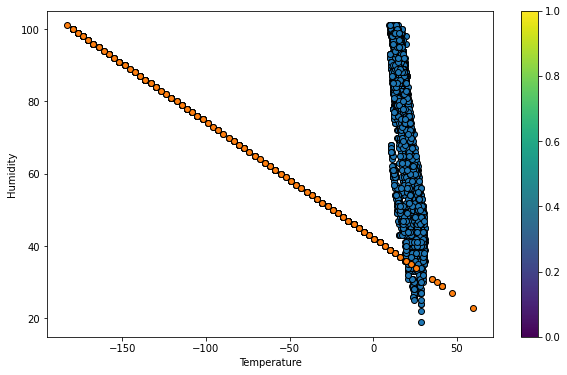

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))
g = ax.scatter(x = T_data_train, 
               y = RH_data_train,
               cmap = "magma",
               vmin=0, vmax=10000,
               edgecolors = 'black')

g = ax.scatter(x = Temp_new_data,
                y = RH_data_test,
                cmap = "magma",
               vmin=0, vmax=10000,
               edgecolors = 'black')

fig.colorbar(g)

plt.xlabel("Temperature")
plt.ylabel("Humidity")
 
plt.show()